In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import decimal 
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [12]:
def get_data(stock_ticker, beginning_date, end_date):
    data = yf.download(stock_ticker, beginning_date, end_date)
    days = len(data["Adj Close"]) 

    return data, days
    

In [13]:
def standard_dev_model(m):
    vol_squared  = Decimal(0)
    
    for i in range(1,m+1):

        Rn = ((( Decimal(data['Adj Close'][m + 1 -i]) -  Decimal(data['Adj Close'][m  - i ]) ) / (Decimal(data['Adj Close'][m - i]))) **2 )* Decimal((1/m)) 


        vol_squared += Rn

        vol = Decimal(math.sqrt(vol_squared))

    

    return float(vol)

In [35]:
def ewma_model(m):
    returns = []
    for i in range(1,m+1):
        returns.append((( Decimal(data['Adj Close'][m + 1 -i]) -  Decimal(data['Adj Close'][m  - i ]) ) / (Decimal(data['Adj Close'][m - i]))))
    
    weights = np.exp(np.linspace(-1., 0., len(returns)))
    weights /= weights.sum()
    weights = [Decimal(w) for w in weights]  # Convert weights to Decimal

    
    ewma_variance = Decimal(0)

    for i in range(len(returns)):
        ewma_variance += Decimal(weights[i]) * (returns[i]**2)

    ewma_vol = math.sqrt(ewma_variance)

    return float(ewma_vol)

        

In [15]:

def create_vol(days, function):
    daily_vol = []
    for j in range(1,days):
        daily_vol.append(function(j))

    return daily_vol
    
    

In [16]:
def getdates(data):
    dates = []
    for i in range(2,len(data)+1):
            data_subset = data.iloc[:i] 
            dates.append(data.index[i-1].strftime('%Y-%m-%d'))
    return dates
    

In [38]:
def plot_data(daily_vol, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, daily_vol, linestyle='-')

    plt.xlabel('Date')
    plt.ylabel('Daily Volatility')
    plt.title('Daily Volatility Over Time')

    # Set x-axis ticks to show every xth date
    plt.gca().set_xticks(dates[::100])
    plt.gca().set_xticklabels(dates[::100])

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [69]:
data, days = get_data('SPY','2006-01-01','2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [70]:
daily_vol = create_vol(days,standard_dev_model)

C:\Users\chenr\AppData\Local\Temp\ipykernel_23508\1235979333.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Rn = ((( Decimal(data['Adj Close'][m + 1 -i]) -  Decimal(data['Adj Close'][m  - i ]) ) / (Decimal(data['Adj Close'][m - i]))) **2 )* Decimal((1/m))


In [71]:
dates = getdates(data)

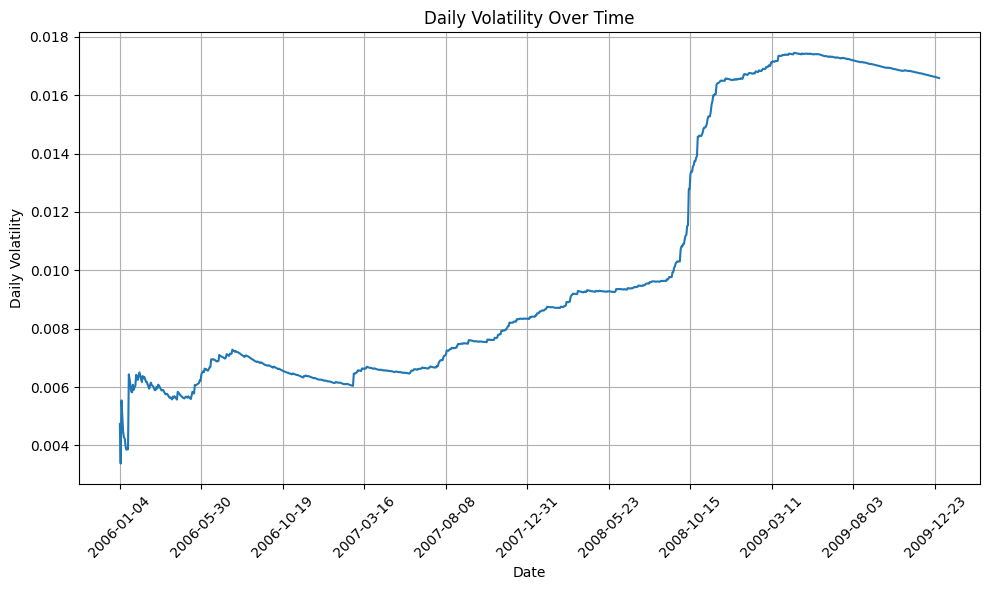

In [72]:
plot_data(daily_vol, dates)

In [73]:
daily_vol = create_vol(days,ewma_model)

C:\Users\chenr\AppData\Local\Temp\ipykernel_23508\35471631.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns.append((( Decimal(data['Adj Close'][m + 1 -i]) -  Decimal(data['Adj Close'][m  - i ]) ) / (Decimal(data['Adj Close'][m - i]))))


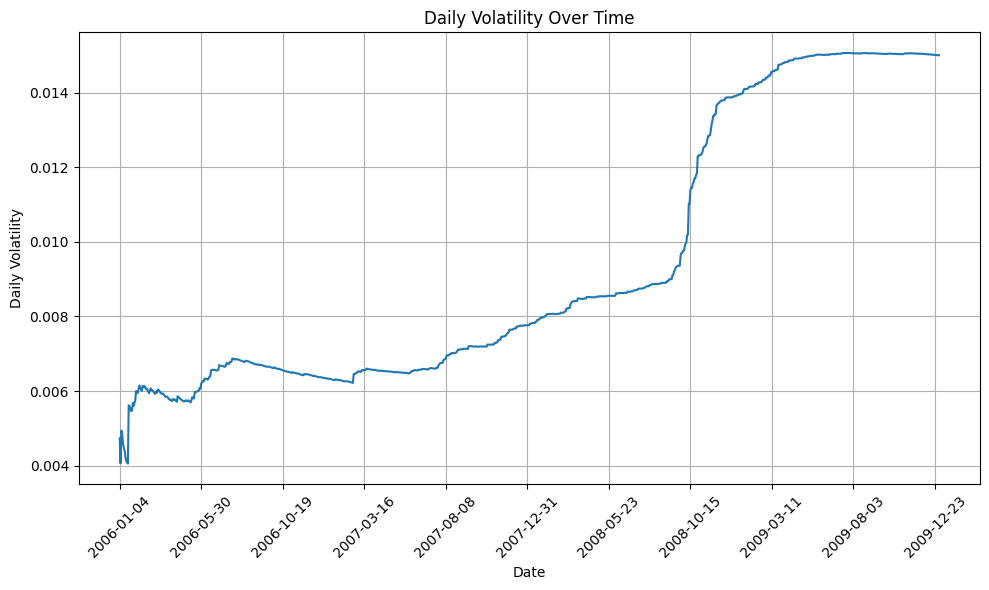

In [74]:
plot_data(daily_vol, dates)